In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [22]:
 data = pd.read_csv("housing.csv")
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


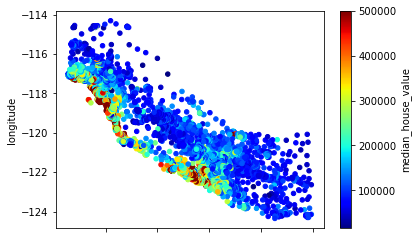

In [23]:
data.plot(kind="scatter",x="latitude",y="longitude",c="median_house_value",cmap=plt.get_cmap("jet"))
plt.show()

In [24]:
data = data.iloc[:,2:]
data


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
data["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
# arrange the uniqe values in Deending order
l = ['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND' ]


In [27]:
 l.index("NEAR BAY")

2

In [28]:
def convert(x):
    return l.index(x)+1
convert("NEAR BAY")

3

In [29]:
data["ocean_proximity"] = data["ocean_proximity"].apply(convert)

In [30]:
data[data["total_bedrooms"].isna()]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,3
341,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,3
538,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,3
563,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,3
696,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,3
...,...,...,...,...,...,...,...,...
20267,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,2
20268,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,2
20372,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,4
20460,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,4


In [31]:
data = data.dropna()

In [32]:
X = data[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]]
Y = data["median_house_value"]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
predicted = model.predict(x_test)

In [37]:
MSE = ((y_test.values-predicted)**2).mean()
MSE

5085101274.368271

In [38]:
predicted

array([213772.15770031, 172714.54806571, 145012.38815624, ...,
       133297.01979032, 161206.27272979, 207797.2215209 ])

In [39]:
y_test

14185     98900.0
6125     153000.0
14095     91300.0
14359    345200.0
18004    344100.0
           ...   
19533     76300.0
7695     261600.0
15558    127000.0
16731    158600.0
9740     175000.0
Name: median_house_value, Length: 4087, dtype: float64

In [40]:
MSE = ((y_test-predicted)**2).mean()
MSE

5085101274.368293

In [41]:
import pickle

In [43]:
f = open('LR_Model.sav',"wb")
pickle.dump(model,f)
f.close()